In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df= pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
#dropping "Unnamed: 0" column
df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
# Data for the pie chart (excluding 'Sales')
labels = ['TV', 'Radio', 'Newspaper']
sizes = [df['TV'].sum(), df['Radio'].sum(), df['Newspaper'].sum()]

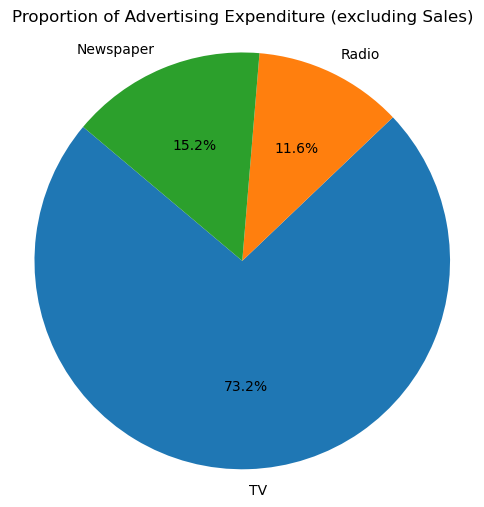

In [10]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Advertising Expenditure (excluding Sales)')
plt.show()

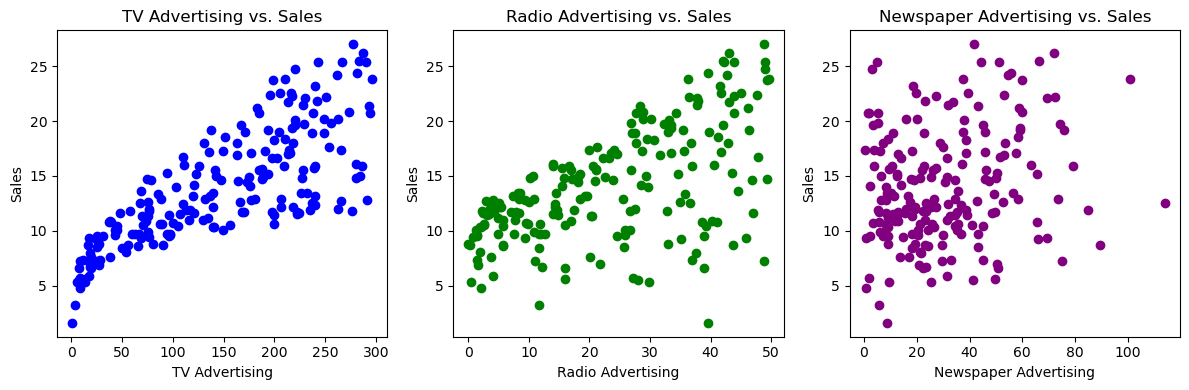

In [11]:
plt.figure(figsize=(12, 4))

# Line plot for TV vs. Sales
plt.subplot(1, 3, 1)
plt.plot(df['TV'], df['Sales'], 'o', color='blue')
plt.title('TV Advertising vs. Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')

# Line plot for Radio vs. Sales
plt.subplot(1, 3, 2)
plt.plot(df['Radio'], df['Sales'], 'o', color='green')
plt.title('Radio Advertising vs. Sales')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')

# Line plot for Newspaper vs. Sales
plt.subplot(1, 3, 3)
plt.plot(df['Newspaper'], df['Sales'], 'o', color='purple')
plt.title('Newspaper Advertising vs. Sales')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Load the dataset (replace 'df' with your DataFrame)
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target variable

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Models to consider
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}


In [17]:
# Hyperparameters to tune for each model
param_grids = {
    'Linear Regression': {},
    'Decision Tree Regressor': {'max_depth': [3, 5, 7]},
    'Random Forest Regressor': {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]},
    'XGBoost Regressor': {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}
}



In [18]:
# Train and evaluate models
best_model = None
best_model_name = ''
best_r2 = -np.inf

for model_name, model in models.items():
    # Hyperparameter tuning
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='r2')
        grid_search.fit(X_train_scaled, y_train)
        model = grid_search.best_estimator_

    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} - R-squared:', r2)

    # Update the best model if needed
    if r2 > best_r2:
        best_model = model
        best_model_name = model_name
        best_r2 = r2


Linear Regression - R-squared: 0.8994380241009119
Decision Tree Regressor - R-squared: 0.9324004367993426
Random Forest Regressor - R-squared: 0.9814696198187415
XGBoost Regressor - R-squared: 0.9819330584897474


In [19]:

print('Best Performing Model:', best_model_name)
print('Best R-squared:', best_r2)

Best Performing Model: XGBoost Regressor
Best R-squared: 0.9819330584897474


In [24]:
def predict_sales(tv_advertising, radio_advertising, newspaper_advertising):

    # Standardize the input features
    input_features = np.array([[tv_advertising, radio_advertising, newspaper_advertising]])
    input_features_scaled = scaler.transform(input_features)  
    
    # Predicting sales using the best model
    predicted_sales = best_model.predict(input_features_scaled)
    
    return predicted_sales[0]

In [25]:
predict_sales(230.1,37.8,69.2)

22.087126

In [22]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
